In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib as mpl
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

### Implementing the ADAM optimizer for a given loss function (Practice)

The goal is to employ the ADAM optimizer on the function:
$$
\left(1.5-x+xy\right)^2+\left(2.25-x+xy^2\right)^2+\left(2.625-x+xy^3\right)^2
$$

The gradient for this function can be computed manually which is:
$$
2\left[(y-1)\left(1.5-x+xy\right)+(y^2-1)\left(2.25-x+xy^2\right)+(y^3-1)\left(2.625-x+xy^3\right)\right]\hat{x} \\
+2\left[(x)\left(1.5-x+xy\right)+(2xy)\left(2.25-x+xy^2\right)+(3xy^2)\left(2.625-x+xy^3\right)\right]\hat{y}
$$

In [40]:
#Function to optimize
def func(x,y):
    return ((1.5-x+x*y)**2 +(2.25-x+x*y**2)**2 +(2.625-x+x*y**3)**2)

#Gradient of the function
def grad(pos):
    x=pos[0]
    y=pos[1]
    grad_x= 2*((y-1)*(1.5-x+x*y)+(y**2-1)*(2.25-x+x*y**2)+(y**3-1)*(2.625-x+x*y**3))
    grad_y= 2*(x*(1.5-x+x*y) +(2*x*y)*(2.25-x+x*y**2)+(3*x*y**2)*(2.625-x+x*y**3))

    return np.array([grad_x,grad_y])

#Implementing ADAM
def ADAM(func,grad,init_pos,lr=0.001,beta_1=0.9,beta_2=0.99,eps=1e-8,max_iters=100000,tol=1e-4):
    pos=init_pos
    m= np.zeros_like(pos)
    s= np.zeros_like(pos)
    
    for t in tqdm(range(1,max_iters+1)):
        g= grad(pos)
        #if np.all(np.abs(g)<tol):
            #print(f"Converged in {t} iterations")
            #break
                  
        m= beta_1*m +(1-beta_1)*g
        s= beta_2*s +(1-beta_2)*g**2
        m_hat_t= m/(1-beta_1**t)
        s_hat_t= s/(1-beta_2**t)
        pos-= lr*m_hat_t/(np.sqrt(s_hat_t)+eps)
            
    

    return pos,func(pos[0],pos[1])


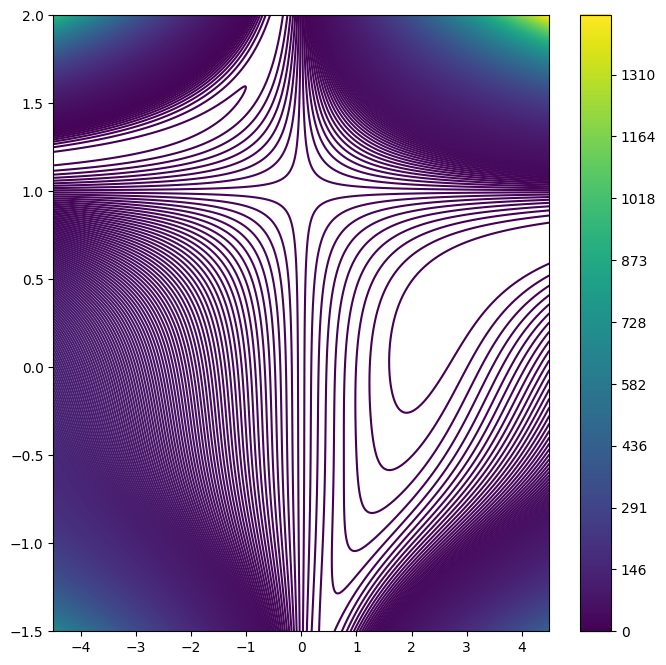

In [47]:
#Visualisation
xs= np.linspace(-4.5,4.5,1000)
ys= np.linspace(-1.5,2,1000)
Xs,Ys= np.meshgrid(xs,ys)
Zs= func(Xs,Ys)

fig= plt.figure(figsize=(8,8))
axs= plt.axes()
im= axs.contour(Xs,Ys,Zs,1000)
fig.colorbar(im,ax=axs)
plt.show()

In [41]:
#Initial guess for minima
init_pos= np.array([1.,-1.])

#Running ADAM
optimal_pos,optimal_func= ADAM(func,grad,init_pos) 

print(f"Optimal theta is {optimal_pos} \noptimal function value is {optimal_func}")

100%|██████████| 100000/100000 [00:01<00:00, 63247.17it/s]

Optimal theta is [2.99999559 0.50000389] 
optimal function value is 5.75908971025836e-10
